# PROBLEM STATEMENT

A Google Forms Survey Was Conducted In May 2021 Among College Students Of Delhi. A Survey was conducted on wherein students of Indian Colleges answered some questions regarding their Employment expectations after graduating.

This dataset contains the columns:Index,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome.

AIM:

The Data Was Aimed At Opinions Regarding Employment Among The Indian Urban Youth. Analyse the data and find interesting insights.
Find Some Insights Regarding The Opinion Of Youngsters.  find patterns among the choices.

# Import libraries

In [27]:
import numpy as np 
import pandas as pd #for analysis 
import matplotlib.pyplot as plt #for visualization
import seaborn as sns#visualization and eda
%matplotlib inline 
sns.set_style('darkgrid')
from sklearn.cluster import KMeans

In [20]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# import dataset

In [21]:
job=pd.read_csv("C:\\Users\\kpmuj\\Downloads\\JobSurveyIndia.csv")

In [4]:
job

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K
...,...,...,...,...,...,...,...
395,395,Private Sector,Non-Technical,No,Yes,5.0,600K-900K
396,396,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
397,397,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
398,398,Government Sector,Non-Technical,No,No,5.0,More Than 1500K


# Data cleaning and preparations

In [5]:
#checking the size of dataset
job.shape

(400, 7)

There are 400 rows and 7 columns in the dataset

In [6]:
#printing first five rows
job.head()

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K


In [7]:
#printing last five rows
job.tail()

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
395,395,Private Sector,Non-Technical,No,Yes,5.0,600K-900K
396,396,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
397,397,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
398,398,Government Sector,Non-Technical,No,No,5.0,More Than 1500K
399,399,Entrepreneurship,Non-Technical,Yes,No,6.0,900K-1200K


In [8]:
#VIEW THE STATISTICAL SUMMARY OF NUMERICAL VARIABLES
job.describe()

,Unnamed: 0,IdealNumberOfWorkdays
count,400.000000,400.000000
mean,199.500000,4.902500
std,115.614301,0.805989
min,0.000000,4.000000
25%,99.750000,4.000000
50%,199.500000,5.000000
75%,299.250000,5.000000
max,399.000000,7.000000


In [9]:
#checking the datatypes of columns in the hr dataset
job.dtypes

Unnamed: 0                 int64
Employment Sector         object
Employment Background     object
Public Dealing            object
Degree                    object
IdealNumberOfWorkdays    float64
IdealYearlyIncome         object
dtype: object

There are one integer type and five object type and one floating type

In [10]:
#List of all keys
job.keys

<bound method NDFrame.keys of      Unnamed: 0  Employment Sector Employment Background Public Dealing  \
0             0     Private Sector             Technical             No   
1             1     Private Sector                  Art             No    
2             2  Government Sector             Technical             No   
3             3  Government Sector         Non-Technical            Yes   
4             4     Private Sector             Technical             No   
..          ...                ...                   ...            ...   
395         395     Private Sector         Non-Technical            No    
396         396  Government Sector         Non-Technical            Yes   
397         397  Government Sector         Non-Technical            Yes   
398         398  Government Sector         Non-Technical             No   
399         399   Entrepreneurship         Non-Technical            Yes   

    Degree  IdealNumberOfWorkdays IdealYearlyIncome  
0      Yes     

In [11]:
#VIEW SUMMARY OF DATASET
#checking the info of dataset
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             400 non-null    int64  
 1   Employment Sector      400 non-null    object 
 2   Employment Background  400 non-null    object 
 3   Public Dealing         400 non-null    object 
 4   Degree                 400 non-null    object 
 5   IdealNumberOfWorkdays  400 non-null    float64
 6   IdealYearlyIncome      400 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.0+ KB


In [12]:
#checking number of unique elements in the dataset
job.nunique()

Unnamed: 0               400
Employment Sector          3
Employment Background      4
Public Dealing             3
Degree                     3
IdealNumberOfWorkdays      4
IdealYearlyIncome          4
dtype: int64

In [13]:
#random row from the dataset
job.sample()

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
7,7,Private Sector,Non-Technical,Yes,Yes,4.0,900K-1200K


In [14]:
job.sample(10)

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
331,331,Private Sector,Technical,Yes,Yes,4.0,More Than 1500K
266,266,Entrepreneurship,Non-Technical,Yes,No,6.0,900K-1200K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
103,103,Private Sector,Technical,No,Yes,5.0,1200K-1500K
234,234,Government Sector,Non-Technical,Yes,No,5.0,1200K-1500K
398,398,Government Sector,Non-Technical,No,No,5.0,More Than 1500K
265,265,Government Sector,Non-Technical,No,Yes,5.0,600K-900K
352,352,Private Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
101,101,Government Sector,Art,Yes,No,5.0,900K-1200K
284,284,Entrepreneurship,Art,Yes,Yes,6.0,1200K-1500K


sample(10) gives the 10 random rows from the dataset

In [15]:
#pairwise correlation
job.corr()

,Unnamed: 0,IdealNumberOfWorkdays
Unnamed: 0,1.000000,-0.037991
IdealNumberOfWorkdays,-0.037991,1.000000


corr() function is to find correlation among the columns

<AxesSubplot:>

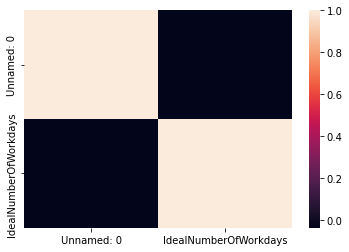

In [16]:
sns.heatmap(job.corr())

heatmap created to understand the linear relationship between different variables in the job dataset Correlation heatmap is graphical representation of correlation matrix representing correlation between different variables

In [17]:
#checking the column names
job.columns

Index(['Unnamed: 0', 'Employment Sector', 'Employment Background',
       'Public Dealing', 'Degree', 'IdealNumberOfWorkdays',
       'IdealYearlyIncome'],
      dtype='object')

Let's look at this column by column!

Employment Sector: Choice Of Sector Of Employment

Employment Background: Choice Of Background Of Employment
    
Public Dealing: Would Public Dealing Be A Problem For You?
    
Degree: Are You Pursuing A Degree That Is Necessary For Your Ideal Choice Of Employment?
    
IdealNumberOfWorkdays: Ideal Number Of Work Days In A Week
    
IdealYearlyIncome: Ideal Yearly Income In Rupees

In [18]:
#missing values
job.isnull()

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False


In [19]:
#number of missing values
job.isnull().sum()

Unnamed: 0               0
Employment Sector        0
Employment Background    0
Public Dealing           0
Degree                   0
IdealNumberOfWorkdays    0
IdealYearlyIncome        0
dtype: int64

There is no null values in the dataset

In [12]:
#Replacing Values for Non-Ambiguity Entries.

job['Employment Background'] = job['Employment Background'].apply(lambda x:'Art' if x=='Art ' else x )
job['Degree'] =job['Degree'].apply(lambda x:'Yes' if x=='Yes ' else x)
job['Public Dealing'] =job['Public Dealing'].apply(lambda x:'No' if x=='No ' else x)

In [13]:
#Dropping the Unnecessary column.

job.drop(columns='Unnamed: 0',inplace=True)

drop()function is used to remove row or columns by specifying label names and corresponding axis

 lets replace the categorical value with a numeric value using label encoder

In [24]:
from sklearn import preprocessing
 

label_encoder = preprocessing.LabelEncoder()

In [25]:
job["Employment Sector_label"]=label_encoder.fit_transform(job["Employment Sector"])

In [12]:
job

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome,Employment Sector_label
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K,2
1,1,Private Sector,Art,No,Yes,4.0,600K-900K,2
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K,1
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K,1
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K,2
...,...,...,...,...,...,...,...,...
395,395,Private Sector,Non-Technical,No,Yes,5.0,600K-900K,2
396,396,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K,1
397,397,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K,1
398,398,Government Sector,Non-Technical,No,No,5.0,More Than 1500K,1


If the categorical variable value contains 5 distinct classes, we use (0, 1, 2, 3, and 4)
here ,the value contains 3 distinct classes,so we use (0,1,2)

In [58]:
#students prefer government sector
job[job['Employment Sector']=='Government Sector']

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome,Employment Sector_label
2,Government Sector,Technical,No,Yes,6.0,900K-1200K,1
3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K,1
9,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K,1
10,Government Sector,Art,Yes,No,5.0,900K-1200K,1
11,Government Sector,Non-Technical,No,No,5.0,More Than 1500K,1
...,...,...,...,...,...,...,...
390,Government Sector,Non-Technical,Yes,No,5.0,1200K-1500K,1
393,Government Sector,Technical,No,No,5.0,More Than 1500K,1
396,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K,1
397,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K,1


here we can see that half of the students Choice Of  Employment sector is government sector.and most of them are not Pursuing A Degree That Is Necessary For their Ideal Choice Of Employment

In [59]:
#students prefer greater than 6 working days in a week
job[job['IdealNumberOfWorkdays']>6]

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome,Employment Sector_label
30,Entrepreneurship,Art,Yes,Yes,7.0,1200K-1500K,0
67,Entrepreneurship,Art,Yes,Yes,7.0,1200K-1500K,0
89,Entrepreneurship,Art,Yes,Yes,7.0,1200K-1500K,0
105,Entrepreneurship,Art,Yes,Yes,7.0,1200K-1500K,0
122,Entrepreneurship,Art,Yes,Yes,7.0,1200K-1500K,0
144,Entrepreneurship,Art,Yes,Yes,7.0,1200K-1500K,0
161,Entrepreneurship,Art,Yes,Yes,7.0,1200K-1500K,0
162,Entrepreneurship,Art,Yes,Yes,7.0,1200K-1500K,0
215,Entrepreneurship,Art,Yes,Yes,7.0,1200K-1500K,0
222,Entrepreneurship,Art,Yes,Yes,7.0,1200K-1500K,0


here we can see that most of the students who prefer seven days  Of Work Days In A Week are selected entrepreneurship sector

In [61]:
#percentage of preference of distinct Sector

sec1= job.loc[job['Employment Sector']=='Private Sector']
sec2= job.loc[job['Employment Sector']=='Government Sector']
sec3= job.loc[job['Employment Sector']=='Entrepreneurship']

private= 100*(len(sec1)/len(job))
govt= 100*(len(sec2)/len(job))
entre= 100*(len(sec3)/len(job))

print(private,'% of Students Prefer to be in Private Sector.')
print(govt,'% of Students Prefer to be in Government Sector.')
print(entre,'% of Students Prefer to be a Entrepreuner.')

33.75 % of Students Prefer to be in Private Sector.
47.25 % of Students Prefer to be in Government Sector.
19.0 % of Students Prefer to be a Entrepreuner.


loc()function helps us to retrieve data values from a dataset at an ease.using the loc() function, we can access the data values fitted in the particular row or column based on the index value passed to the function.

In [62]:
#percentage of preference in Distinct Background

sec1= job.loc[job['Employment Background']=='Technical']
sec2= job.loc[job['Employment Background']=='Non-Technical']
sec3= job.loc[job['Employment Background']=='Art']

Tech= round(100*(len(sec1)/len(job)),2)
Non_Tech= round(100*(len(sec2)/len(job)),2)
Art= round(100*(len(sec3)/len(job)),2)

print(Tech,'% of Students Prefer to go into Technical Field.')
print(Non_Tech,'% of Students Prefer to go into Non-Technical Field.')
print(Art,'% of Students Prefer to go into Art Field.')

29.0 % of Students Prefer to go into Technical Field.
55.5 % of Students Prefer to go into Non-Technical Field.
15.5 % of Students Prefer to go into Art Field.


In [22]:
#K-Means model with three clusters 
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [26]:

y_predicted=km.fit_predict(job[['IdealNumberOfWorkdays','Employment Sector_label']])
y_predicted

array([1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2,
       0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 2, 1, 0,
       1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1,
       2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 1,
       1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2,
       2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0,
       0, 2, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 2, 0, 1,
       0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2,

In [15]:
job['cluster']=y_predicted
job.head()

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome,Employment Sector_label,cluster
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K,2,1
1,1,Private Sector,Art,No,Yes,4.0,600K-900K,2,1
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K,1,0
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K,1,2
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K,2,1


In [16]:
##K-Means model parameters study
km.cluster_centers_

array([[6.18292683, 0.17073171],
       [4.46666667, 2.        ],
       [4.65027322, 0.95628415]])

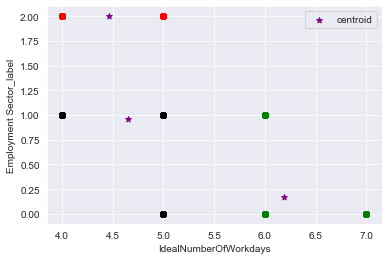

In [18]:
job1=job[job.cluster==0]
job2=job[job.cluster==1]
job3=job[job.cluster==2]
plt.scatter(job1.IdealNumberOfWorkdays,job1['Employment Sector_label'],color='green')
plt.scatter(job2.IdealNumberOfWorkdays,job2['Employment Sector_label'],color='red')
plt.scatter(job3.IdealNumberOfWorkdays,job3['Employment Sector_label'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('IdealNumberOfWorkdays')
plt.ylabel('Employment Sector_label')
plt.legend()

# Exploratory Data Analysis

lets try to check Number Of Students Preferring Different Type of Sectors for Job

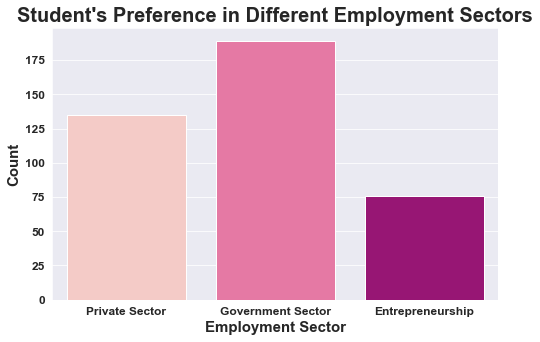

In [30]:
fig= plt.figure(figsize=(8,5))

sns.countplot(x='Employment Sector',data=job,palette='RdPu')

plt.title("Student's Preference in Different Employment Sectors",fontsize=20,fontweight='bold')
plt.xlabel("Employment Sector",fontsize=15,fontweight='bold')
plt.ylabel("Count",fontsize=15,fontweight='bold')

plt.xticks(fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)
plt.show()

in this plot we can see that more than 175 of the students prefer government sector and less than 140 students prefer private sector.
students who prefer entrepreneurship is 75.most of the student prefer government sector.

lets check the Number Of Students Preferring Different Type of Field for Job

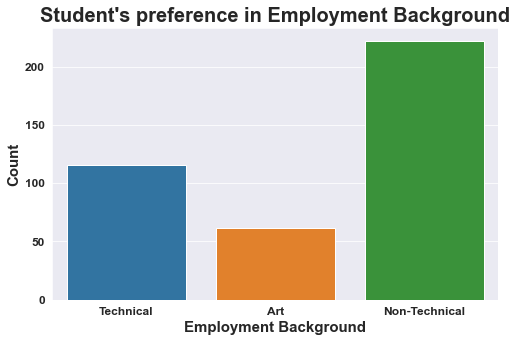

In [63]:
fig= plt.figure(figsize=(8,5))

sns.countplot(x='Employment Background',data=job)

plt.title("Student's preference in Employment Background",fontsize=20,fontweight='bold')
plt.xlabel("Employment Background",fontsize=15,fontweight='bold')
plt.ylabel("Count",fontsize=15,fontweight='bold')

plt.xticks(fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)
plt.show()


here we can see that more than 200 students prefer employment background as non technical.the students who prefer art is very less compared to others

lets check Number Of Students who are Comfortable with Public Dealing

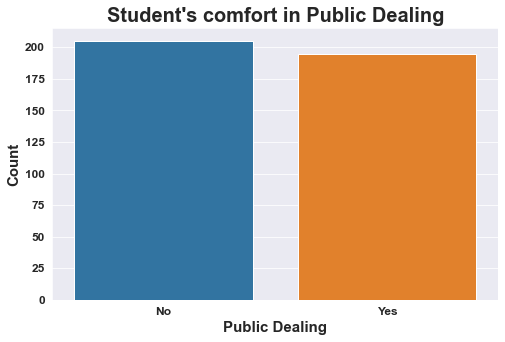

In [64]:
fig= plt.figure(figsize=(8,5))

sns.countplot(x='Public Dealing',data=job)

plt.title("Student's comfort in Public Dealing",fontsize=20,fontweight='bold')
plt.xlabel("Public Dealing",fontsize=15,fontweight='bold')
plt.ylabel("Count",fontsize=15,fontweight='bold')

plt.xticks(fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)
plt.show()

here we can see that greater than 175 students are comfort in public dealing and more than 200 students are not comfortable in public dealing

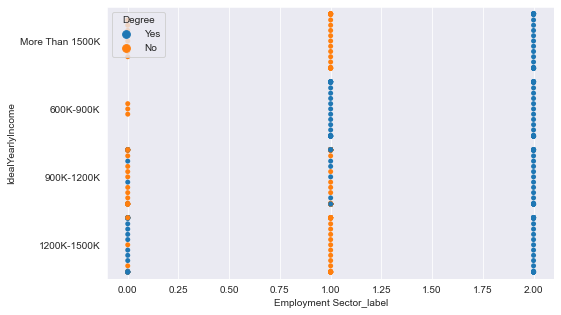

In [68]:
#swarm plot of employment sector_label and idealyearlyincome with hue as degree
fig= plt.figure(figsize=(8,5))
sns.swarmplot(x="Employment Sector_label",y="IdealYearlyIncome",hue="Degree",data=job);
plt.show()

<Figure size 576x360 with 0 Axes>

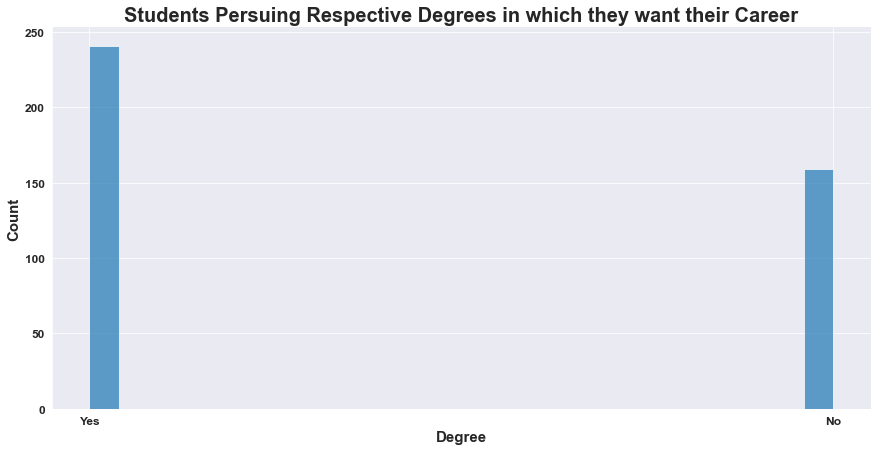

In [69]:
#Number Of Students Persuing the Degree in which they want to make their Career
fig= plt.figure(figsize=(8,5))
g = sns.FacetGrid(job,palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Degree',bins=25,alpha=0.7)

plt.title("Students Persuing Respective Degrees in which they want their Career",fontsize=20,fontweight='bold')
plt.xlabel("Degree",fontsize=15,fontweight='bold')
plt.ylabel("Count",fontsize=15,fontweight='bold')

plt.xticks(fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)
plt.show()

in this plot we can see that more than 200 students persue repective degree

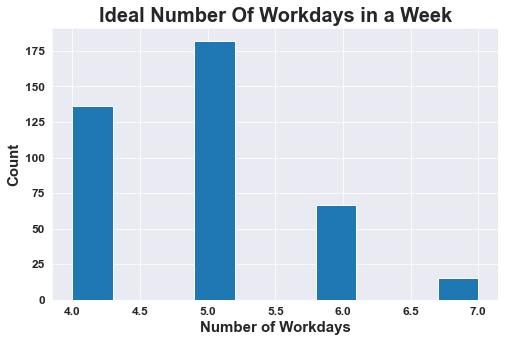

In [70]:
#Number Of Students Preferring Number of Days to Work in a Week
fig= plt.figure(figsize=(8,5))

job.IdealNumberOfWorkdays.hist()

plt.title("Ideal Number Of Workdays in a Week",fontsize=20,fontweight='bold')
plt.xlabel("Number of Workdays",fontsize=15,fontweight='bold')
plt.ylabel("Count",fontsize=15,fontweight='bold')

plt.xticks(fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)
plt.show()

more than 175 students prefer 5 number of working days,less than 25 students prefer 7 working days

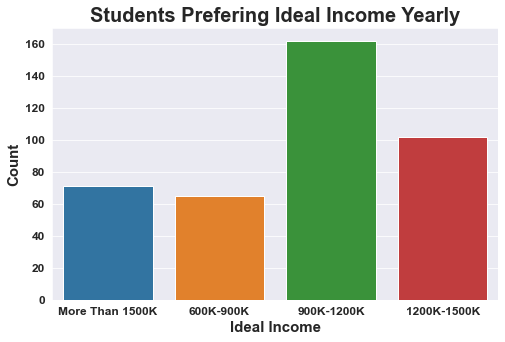

In [72]:
#Number Of Students Preferring an Ideal Salary Per Year
fig= plt.figure(figsize=(8,5))

sns.countplot(x='IdealYearlyIncome',data=job)
plt.title("Students Prefering Ideal Income Yearly",fontsize=20,fontweight='bold')
plt.xlabel("Ideal Income",fontsize=15,fontweight='bold')
plt.ylabel("Count",fontsize=15,fontweight='bold')

plt.xticks(fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)
plt.show()

more than 160 student prefer 900k-1200k income 

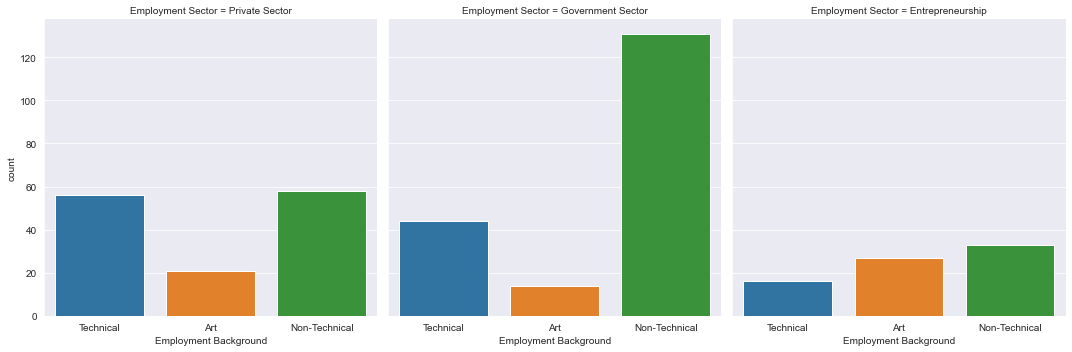

In [7]:
#catplot of employment background and employment sector
sns.catplot(x='Employment Background',data=job,col='Employment Sector',kind='count',aspect=1)

plt.show()


 most of the student who prefer government sector employnment background is non techincal

In [17]:
labels = ["student comfort in Public Dealing",'Not comfort']
values=job['Public Dealing'].value_counts().values

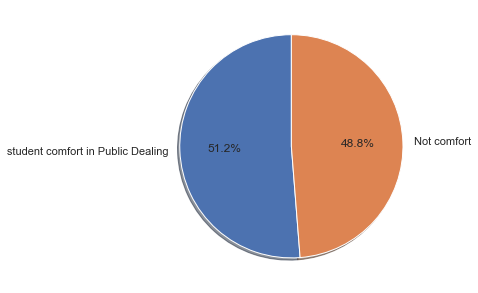

In [18]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

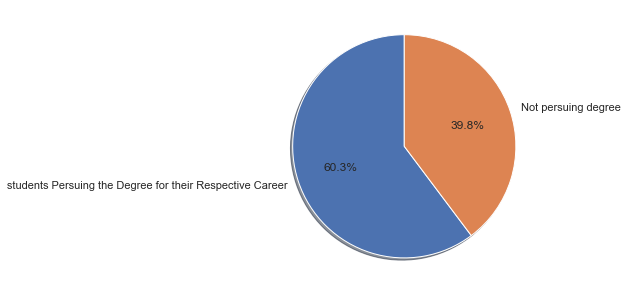

In [19]:
labels4g = ["students Persuing the Degree for their Respective Career",'Not persuing degree']
values4g = job['Degree'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

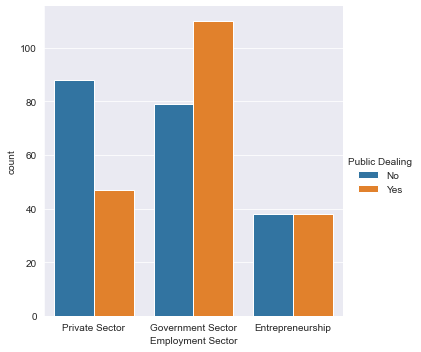

In [8]:
sns.catplot(data=job,x='Employment Sector',kind='count',hue='Public Dealing',aspect=1)

all the students who prefer emploment sector as entrepreneurship are comfort in public dealing

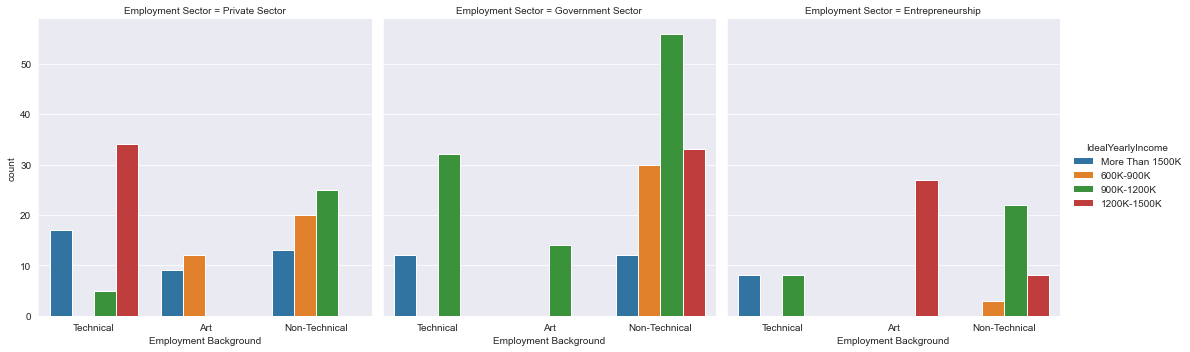

In [9]:
sns.catplot(x='Employment Background',data=job,col='Employment Sector',kind='count',hue='IdealYearlyIncome',aspect=1)
plt.show()

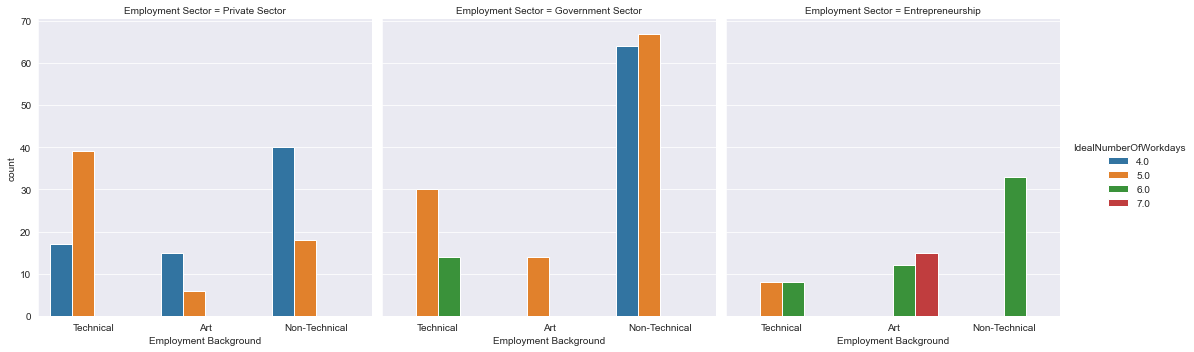

In [11]:
sns.catplot(x='Employment Background',data=job,col='Employment Sector',kind='count',hue='IdealNumberOfWorkdays',aspect=1)
plt.show()


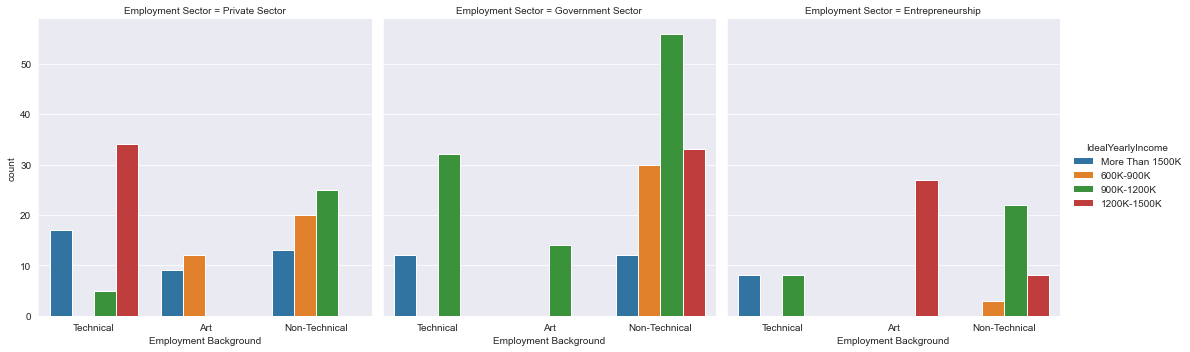

In [14]:
sns.catplot(x='Employment Background',data=job,col='Employment Sector',kind='count',hue='IdealYearlyIncome',aspect=1)
plt.show()

OBSERVATIONS:


1. We Can easily see that most of the students Prefer to have a Government Job once graduated with Non-Technical Background.

2. Students Who Want to make Career in Non-Technical Background are often choose to be in Goverment Sector Rather than in Private Sector or be an Entreprenuer.

3. Students Who want to be in Government Sector are more Confortable with Public Dealing than Students preferring Private Sector.It maybe because Most of the Students with Non-Technical Background Prefer to be in government Sector.

4. Students Who want to go in Private Sector are Persuing the Degree for their Respective Career. And Students Who wants to Be in Arts and want to start their own Start-Up are also persuing The Respective Degrees. It maybe because in Public Sector a degree of the perticular is a must.

5. Students in Arts Love to work that's Why some of them recommend to work all the days in a week whether the average days are 5 days per week.Also the Students who wants to be a Entrepreneur also recommend more than average days to work per week.

6.Students with Technical Background And in Public Sector expects more than Average Salary